In [127]:
import os
import sys
import warnings

sys.path.append(os.path.dirname(os.getcwd()))
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import geomstats.backend as gs
from geomstats.geometry.euclidean import Euclidean
from geomstats.geometry.discrete_curves import DiscreteCurves

from geomstats.geometry.hypersphere import Hypersphere
import geomstats.visualization as visualization

from geomstats.learning.frechet_mean import FrechetMean
from geomstats.learning.pca import TangentPCA

from geomstats.geometry.discrete_curves import R2, DiscreteCurves, SRVMetric

from scipy.stats import zscore # usage: pt_std = zscore(pts,axis=1)

from myvtk.GetMakeVtk import *

r3 = Euclidean(dim=3)
curves_r3 = DiscreteCurves(ambient_manifold=r3)

In [128]:
pts = np.load("./centroid_aligned_pts_20221217-134230.npy")
k_sampling_points = 64

In [129]:
from geomstats.geometry.pre_shape import PreShapeSpace

M_AMBIENT = 2

PRESHAPE_SPACE = PreShapeSpace(m_ambient=M_AMBIENT, k_landmarks=k_sampling_points)
PRESHAPE_METRIC = PRESHAPE_SPACE.embedding_space.metric


def exhaustive_align(curve, base_curve):
    """Align curve to base_curve to minimize the L² distance.

    Returns
    -------
    aligned_curve : discrete curve
    """
    nb_sampling = len(curve)
    distances = gs.zeros(nb_sampling)
    base_curve = gs.array(base_curve)
    for shift in range(nb_sampling):
        reparametrized = [curve[(i + shift) % nb_sampling] for i in range(nb_sampling)]
        aligned = PRESHAPE_SPACE.align(point=gs.array(reparametrized), base_point=base_curve)
        distances[shift] = PRESHAPE_METRIC.norm(
            gs.array(aligned) - gs.array(base_curve)
        )
    shift_min = gs.argmin(distances)
    reparametrized_min = [
        curve[(i + shift_min) % nb_sampling] for i in range(nb_sampling)
    ]
    aligned_curve = PRESHAPE_SPACE.align(
        point=gs.array(reparametrized_min), base_point=base_curve
    )
    return aligned_curve

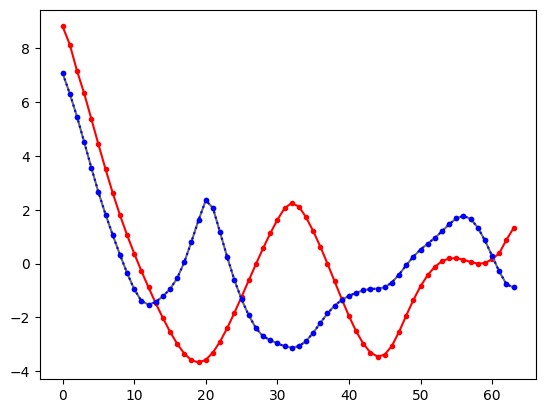

In [130]:
curv_a = pts[0]
curv_b = pts[np.random.randint(len(pts))]

curv_b_align = exhaustive_align(curv_b, curv_a)

plt.plot(curv_a[:,0], color="red",marker=".")

plt.plot(curv_b[:,0], color= "dimgray",marker=".")

plt.plot(curv_b_align[:,0], color= "blue",marker=".", linestyle=":")

In [131]:
for i in range(1, len(pts)):
    pts[i] = exhaustive_align(pts[i], pts[0])


### DiscreteCurves可能只负责测量（metric）但做不了把一个dataset映射到流形上？？

In [126]:
from geomstats.geometry.discrete_curves import R3, DiscreteCurves, SRVMetric

CURVES_SPACE = DiscreteCurves(ambient_manifold=R3, k_sampling_points=64)
SRV_METRIC = CURVES_SPACE.srv_metric

#CURVES_SPACE.shape

print (CURVES_SPACE.belongs(point=pts[1]))
# True


True


In [135]:
import geomstats.backend as gs
from geomstats.geometry.discrete_curves import SRVMetric

In [155]:
# Define the points of the curve as a NumPy array with shape (n, 3)
points = pts[1]
ambient_manifold = Euclidean(dim=3)


# Create an instance of the GeometryRepresentation class
representation = SRVMetric(ambient_manifold= ambient_manifold)

# Compute the SRV representation of the curve
srv_representation = representation.srv_transform(points)


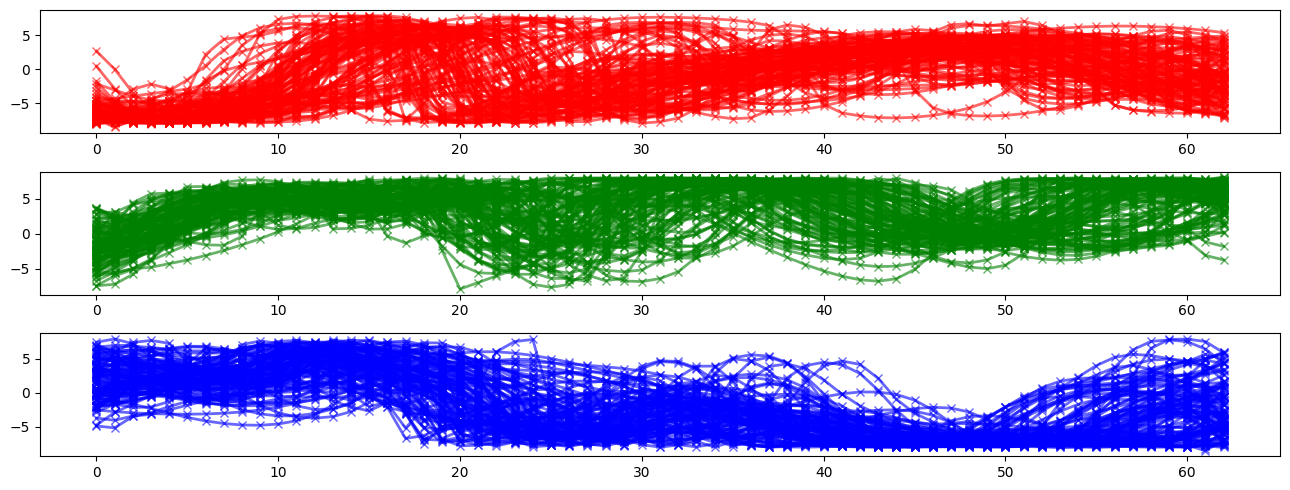

In [186]:
fig = plt.figure(figsize=(13,5))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

srvs = []
for i in range(len(pts)):
    srv_rep = representation.srv_transform(pts[i])
    srvs.append(srv_rep)
    ax1.plot(range(len(srv_rep[:,0])), srv_rep[:,0], color ="red",linewidth=2, marker="x",alpha=0.6)
    # ax1.scatter(range(len(pts[i][:,0])), pts[i][:,0], color ="dimgray",s=2)
    ax2.plot(range(len(srv_rep[:,1])), srv_rep[:,1], color = "green",linewidth=2, marker="x",alpha=0.6)
    ax3.plot(range(len(srv_rep[:,2])), srv_rep[:,2], color = "blue",linewidth=2, marker="x",alpha=0.6)
plt.tight_layout()
    

1 (104, 192)
2 (104, 192)
(104, 3)


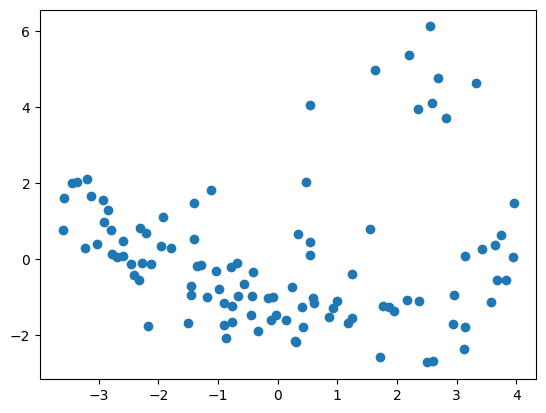

In [198]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
trip_pts = np.append(pts[:,:,0], np.append(pts[:,:,1],pts[:,:,2],axis=1),axis=1)
print ("1",trip_pts.shape)
trip_pts =  zscore(trip_pts,axis=1)
print ("2",trip_pts.shape)
feature = pca.fit_transform(trip_pts)
print (feature.shape)
plt.scatter(feature[:,0], feature[:,1])

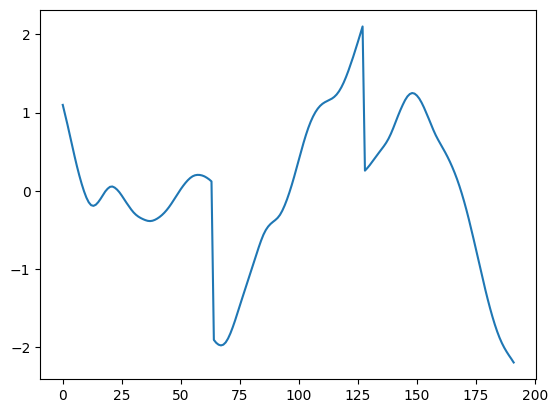

In [199]:
plt.plot(pca.mean_)